In [1]:
import csv

# Nombre del archivo CSV
archivo_csv = "Rayos X.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿Ángulo del crista theta/°": [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1,

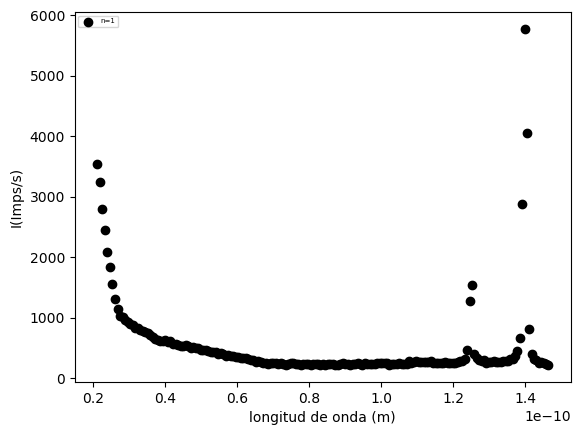

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

A = columnas["﻿Ángulo del crista theta/°"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(np.sin(np.deg2rad(A[i]))*(2.014*10**(-10))*2)

A = columnas["﻿Ángulo del crista theta/°"]


B=columnas["Tasa con 35kV R(35kV)/Imp/s"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])
# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black', label= "n=1")
#plt.scatter(X, Y2, label='Diametro2', color='red')
#plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
#plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('longitud de onda (m)')
plt.ylabel("I(Imps/s)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("LambdavsI.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


In [3]:
ids_max_I = np.argsort(Y)[-5:]
print(ids_max_I)
# Encontrar las longitudes de onda asociadas a los dos máximos de intensidad
L_max1_I = X[174] #Å
Err_L_max1 = 0.007 #Å

max1_I = Y[173] #Imp/s
Err_I_max1 =1.0 #Imp/s


L_max2_I = X[ids_max_I[4]] #Å
Err_L_max2 = 0.005 #Å

max2_I = Y[ids_max_I[1]] #Imp/s
Err_I_max2 = 1.0 #Imp/s

# Imprimir los resultados
print("Kβ se encuentra a los ", 1.232," ± ",round(Err_L_max1,3)," Å")
print(" ")
print("Kα se encuentra a los ",1.388," ± ",round(Err_L_max2,3)," Å")

[172   1   0 174 173]
Kβ se encuentra a los  1.232  ±  0.007  Å
 
Kα se encuentra a los  1.388  ±  0.005  Å


In [4]:
# Nombre del archivo CSV
archivo_csv = "Datos_rayos_X P2.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿Espesor Zn": [0.025, 0.05, 0.075, 0.1, None]
Columna "6": [-1.00012851051624, -1.83608409429951, -1.43061898619135, 0.0545454545454545, None]
Columna "7": [-0.987729589089367, -1.78850743384168, -1.82824776249119, 0.0542888165038002, None]
Columna "8": [-0.987204238380437, -1.82524277335484, -1.98208524484781, 0.0381282495667244, None]
Columna "9": [-0.98447428718906, -1.89516276351455, -2.14807463622461, 0.0302267002518892, None]
Columna "10": [-1.05412096522298, -1.9848761175887, -2.27476813569128, 0.0227479526842584, None]
Columna "11": [-1.09988861302771, -2.07944154167984, -2.14262044330137, 0.0267857142857143, None]
Columna "12": [-1.19038396026404, -2.12525107771113, -2.07944154167984, 0.0298507462686567, None]
Columna "13": [-1.29180351769897, -2.18380155700408, -2.1255326488801, 0.0382882882882883, None]
Columna "14": [-1.26516836535286, -2.0712559570934, -2.0712559570934, 0.0438356164383562, None]
Columna "15": [-134467947988426.0, -2.10526794123973, -2.128798438649

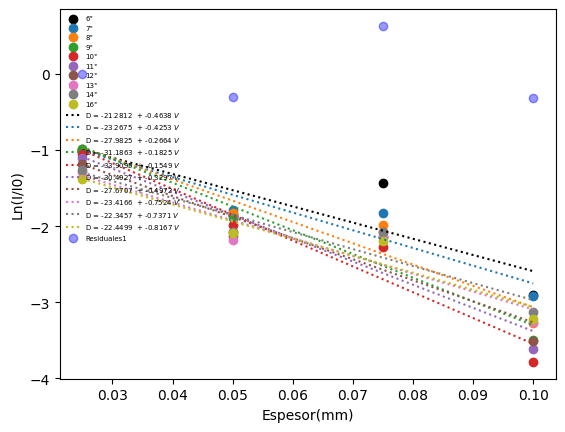

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

A = columnas["﻿Espesor Zn"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["6"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y.append(-2.908720897)
    else:
        Y.append(B[i])
B=columnas["7"]
Y2=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y2.append(-2.91343703)
    else:
        Y2.append(B[i])
B=columnas["8"]
Y3=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y3.append(-3.266799813)
    else:
        Y3.append(B[i])
B=columnas["9"]
Y4=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y4.append(-3.49902963089919)
    else:
        Y4.append(B[i])
B=columnas["10"]
Y5=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y5.append(-3.78328012953542)
    else:
        Y5.append(B[i])
B=columnas["11"]
Y6=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y6.append(-3.61988658262699)
    else:
        Y6.append(B[i])
B=columnas["12"]
Y7=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y7.append(-3.51154543883102)
    else:
        Y7.append(B[i])
B=columnas["13"]
Y8=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y8.append(-3.26261121837601)
    else:
        Y8.append(B[i])
B=columnas["14"]
Y9=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y9.append(-3.12730863134271)
    else:
        Y9.append(B[i])
B=columnas["15"]
Y10=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y10.append(-3.09387933469352)
    else:
        Y10.append(B[i])
B=columnas["16"]
Y11=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    elif i==3:
        Y11.append(-3.21601459258717)
    else:
        Y11.append(B[i])


# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
Label = "D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(X, Y5)
regression_line5 = [(slope5 * x) + intercept5 for x in X]
Label = "D"
slope6, intercept6, r_value6, p_value6, std_err6 = linregress(X, Y6)
regression_line6 = [(slope6 * x) + intercept6 for x in X]
Label = "D"
slope7, intercept7, r_value7, p_value7, std_err7 = linregress(X, Y7)
regression_line7 = [(slope7 * x) + intercept7 for x in X]
Label = "D"
slope8, intercept8, r_value8, p_value8, std_err8 = linregress(X, Y8)
regression_line8 = [(slope8 * x) + intercept8 for x in X]
Label = "D"
slope9, intercept9, r_value9, p_value9, std_err9 = linregress(X, Y9)
regression_line9 = [(slope9 * x) + intercept9 for x in X]
Label = "D"
slope10, intercept10, r_value10, p_value10, std_err10 = linregress(X, Y10)
regression_line10 = [(slope10 * x) + intercept10 for x in X]
Label = "D"
slope11, intercept11, r_value11, p_value11, std_err11 = linregress(X, Y11)
regression_line11 = [(slope11 * x) + intercept11 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black', label= "6°")
plt.scatter(X, Y2, label="7°")
plt.scatter(X, Y3, label="8°")
plt.scatter(X, Y4, label="9°")
plt.scatter(X, Y5, label="10°")
plt.scatter(X, Y6, label="11°")
plt.scatter(X, Y7, label="12°")
plt.scatter(X, Y8, label="13°")
plt.scatter(X, Y9, label="14°")
#plt.scatter(X, Y10, label="15°")
plt.scatter(X, Y11, label="16°")


plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line5, label=f'{Label} = {slope5:.4f}  + {intercept5:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line6, label=f'{Label} = {slope6:.4f}  + {intercept6:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line7, label=f'{Label} = {slope7:.4f}  + {intercept7:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line8, label=f'{Label} = {slope8:.4f}  + {intercept8:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line9, label=f'{Label} = {slope9:.4f}  + {intercept9:.4f} $V$',linestyle='dotted')
#plt.plot(X, regression_line10, label=f'{Label} = {slope10:.4f}  + {intercept10:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line11, label=f'{Label} = {slope11:.4f}  + {intercept11:.4f} $V$',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('Espesor(mm)')
plt.ylabel("Ln(I/I0)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("LNvsEspZn.png",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()


In [6]:
Znslope=[]
Znslope.append(slope1)
Znslope.append(slope2)
Znslope.append(slope3)
Znslope.append(slope4)
Znslope.append(slope5)
Znslope.append(slope6)
Znslope.append(slope7)
Znslope.append(slope8)
Znslope.append(slope9)
Znslope.append(slope10)
Znslope.append(slope11)
Znstd_err=[]
Znstd_err.append(std_err1)
Znstd_err.append(std_err2)
Znstd_err.append(std_err3)
Znstd_err.append(std_err4)
Znstd_err.append(std_err5)
Znstd_err.append(std_err6)
Znstd_err.append(std_err7)
Znstd_err.append(std_err8)
Znstd_err.append(std_err9)
Znstd_err.append(std_err10)
Znstd_err.append(std_err11)
print(Znslope)

[-21.281248205372474, -23.267450605525635, -27.982516781406634, -31.186311615361795, -33.9094780441596, -30.49269124167748, -27.6706995986786, -23.416616775628558, -22.345683191878194, 1613615375861075.0, -22.449907696611078]


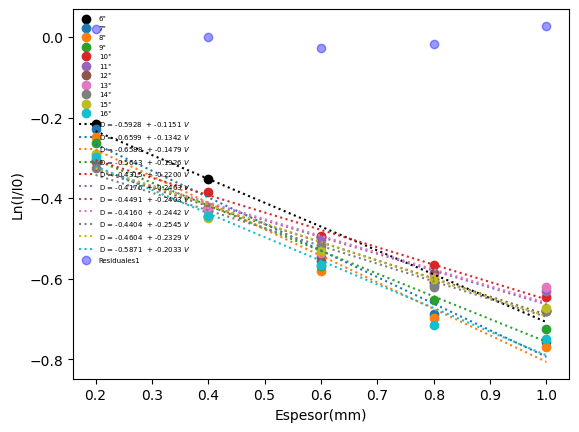

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy as scy

A = columnas["Espesor Al"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["ln(I/I0)6"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])
B=columnas["ln(I/I0)7"]
Y2=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y2.append(B[i])
B=columnas["ln(I/I0)8"]
Y3=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y3.append(B[i])
B=columnas["ln(I/I0)9"]
Y4=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y4.append(B[i])
B=columnas["ln(I/I0)10"]
Y5=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y5.append(B[i])
B=columnas["ln(I/I0)11"]
Y6=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y6.append(B[i])
B=columnas["ln(I/I0)12"]
Y7=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y7.append(B[i])
B=columnas["ln(I/I0)13"]
Y8=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y8.append(B[i])
B=columnas["ln(I/I0)14"]
Y9=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y9.append(B[i])
B=columnas["ln(I/I0)15"]
Y10=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y10.append(B[i])
B=columnas["ln(I/I0)16"]
Y11=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y11.append(B[i])


# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
Label = "D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(X, Y5)
regression_line5 = [(slope5 * x) + intercept5 for x in X]
Label = "D"
slope6, intercept6, r_value6, p_value6, std_err6 = linregress(X, Y6)
regression_line6 = [(slope6 * x) + intercept6 for x in X]
Label = "D"
slope7, intercept7, r_value7, p_value7, std_err7 = linregress(X, Y7)
regression_line7 = [(slope7 * x) + intercept7 for x in X]
Label = "D"
slope8, intercept8, r_value8, p_value8, std_err8 = linregress(X, Y8)
regression_line8 = [(slope8 * x) + intercept8 for x in X]
Label = "D"
slope9, intercept9, r_value9, p_value9, std_err9 = linregress(X, Y9)
regression_line9 = [(slope9 * x) + intercept9 for x in X]
Label = "D"
slope10, intercept10, r_value10, p_value10, std_err10 = linregress(X, Y10)
regression_line10 = [(slope10 * x) + intercept10 for x in X]
Label = "D"
slope11, intercept11, r_value11, p_value11, std_err11 = linregress(X, Y11)
regression_line11 = [(slope11 * x) + intercept11 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))
delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))
delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))
delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))
delta_m5 = std_err5
delta_b5 = std_err5 * np.sqrt(np.mean(np.array(X)**2))
delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black', label= "6°")
plt.scatter(X, Y2, label="7°")
plt.scatter(X, Y3, label="8°")
plt.scatter(X, Y4, label="9°")
plt.scatter(X, Y5, label="10°")
plt.scatter(X, Y6, label="11°")
plt.scatter(X, Y7, label="12°")
plt.scatter(X, Y8, label="13°")
plt.scatter(X, Y9, label="14°")
plt.scatter(X, Y10, label="15°")
plt.scatter(X, Y11, label="16°")


plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line5, label=f'{Label} = {slope5:.4f}  + {intercept5:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line6, label=f'{Label} = {slope6:.4f}  + {intercept6:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line7, label=f'{Label} = {slope7:.4f}  + {intercept7:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line8, label=f'{Label} = {slope8:.4f}  + {intercept8:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line9, label=f'{Label} = {slope9:.4f}  + {intercept9:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line10, label=f'{Label} = {slope10:.4f}  + {intercept10:.4f} $V$',linestyle='dotted')
plt.plot(X, regression_line11, label=f'{Label} = {slope11:.4f}  + {intercept11:.4f} $V$',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('Espesor(mm)')
plt.ylabel("Ln(I/I0)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("LNvsEspAl.png",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()

In [8]:
print(slope1, "+- ", std_err1)
print(slope2, "+- ", std_err2)
print(slope3, "+- ", std_err3)
print(slope4, "+- ", std_err4)
print(slope5, "+- ", std_err5)
print(slope6, "+- ", std_err6)
print(slope7, "+- ", std_err7)
print(slope8, "+- ", std_err8)
print(slope9, "+- ", std_err9)
print(slope10, "+- ", std_err10)
print(slope11, "+- ", std_err11)

-0.5928093745004375 +-  0.04234108498507855
-0.6599140820226059 +-  0.06307860193984623
-0.6587689709634538 +-  0.05989973849155111
-0.5642613784929174 +-  0.0646633129579634
-0.43148658433418047 +-  0.017322343184454723
-0.4175934165703704 +-  0.05021837364323262
-0.4491244511019504 +-  0.04454230567221628
-0.41598203172309395 +-  0.06663554139096585
-0.44040644389608546 +-  0.027727438484481542
-0.4603766354614794 +-  0.051102489120571734
-0.5871302886130134 +-  0.05806783183520776


In [9]:
X=[]
for i in range(6,17):
    X.append((np.sin(np.deg2rad(i))*(2.014*10**(-10))*2)**3)
pZn=7138
pAl=2698
ZAl=13
ZZn=30
Y=[]
Y.append(slope1)
Y.append(slope2)
Y.append(slope3)
Y.append(slope4)
Y.append(slope5)
Y.append(slope6)
Y.append(slope7)
Y.append(slope8)
Y.append(slope9)
Y.append(slope10)
Y.append(slope11)
Yerr=[]
Yerr.append(std_err1)
Yerr.append(std_err2)
Yerr.append(std_err3)
Yerr.append(std_err4)
Yerr.append(std_err5)
Yerr.append(std_err6)
Yerr.append(std_err7)
Yerr.append(std_err8)
Yerr.append(std_err9)
Yerr.append(std_err10)
Yerr.append(std_err11)

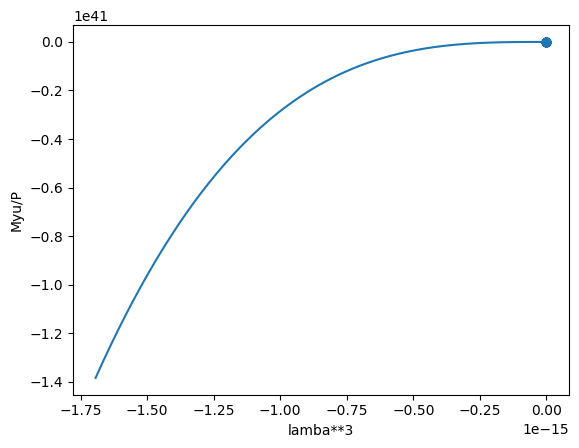

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy as scy

for i in range(len(Y)):
    Y[i]=Y[i]/pAl
for i in range(len(Znslope)):
    Znslope[i]=Znslope[i]/pZn
plt.scatter(X, Y, color='black', label= "Al")
plt.scatter(X, Znslope, label="Zn")

#fit cubic regression model
model = np.poly1d(np.polyfit(X,Y, 3))

plt.xlabel('lamba**3')
plt.ylabel("Myu/P")
#add fitted cubic regression line to scatterplot
polyline = np.linspace(-1*30**-10, 2*10**-30, 300)
plt.plot(polyline, model(polyline))
plt.show()

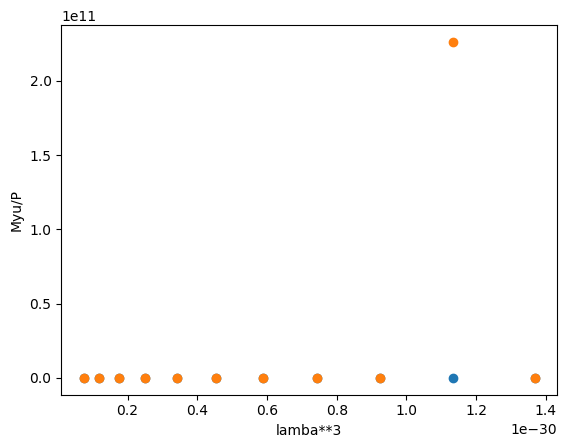

In [11]:
import pandas as pd

import numpy as np

plt.scatter(X,Y)
plt.scatter(X, Znslope)

#add axis labels
plt.xlabel('lamba**3')
plt.ylabel('Myu/P')
plt.savefig("LambdavsMyu.png",bbox_inches='tight')
#display plot
plt.show()

In [12]:
import csv

# Nombre del archivo CSV
archivo_csv = "RayosXP3.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿angulo": [19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0]
Columna "0.1mA": [68.0, 71.0, 73.0, 63.0, 68.0, 84.0, 79.0, 89.0, 78.0, 211.0, 401.0, 397.0, 376.0, 311.0, 109.0, 103.0, 92.0, 87.0, 92.0, 78.0, 78.0, 76.0, 79.0, 77.0, 76.0, 73.0, 71.0, 83.0, 96.0, 105.0, 132.0, 304.0, 1105.0, 1548.0, 1498.0, 1480.0, 833.0, 178.0, 113.0, 71.0, 78.0, 67.0, 60.0, 65.0, 54.0, 59.0, 51.0, 55.0, 59.0, 45.0, 56.0]
Columna "0.2mA": [161.0, 142.0, 153.0, 159.0, 165.0, 162.0, 157.0, 161.0, 197.0, 482.0, 907.0, 823.0, 791.0, 646.0, 215.0, 203.0, 190.0, 183.0, 163.0, 186.0, 167.0, 167.0, 169.0, 165.0, 155.0, 176.0, 173.0, 158.0, 200.0, 201.0, 262.0, 670.0, 2226.0, 3068.0, 2970.0, 2855.0, 1632.0, 353.0, 217.0, 177.0, 163.0, 144.0, 127.0, 140.0

/lib/python3.11/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


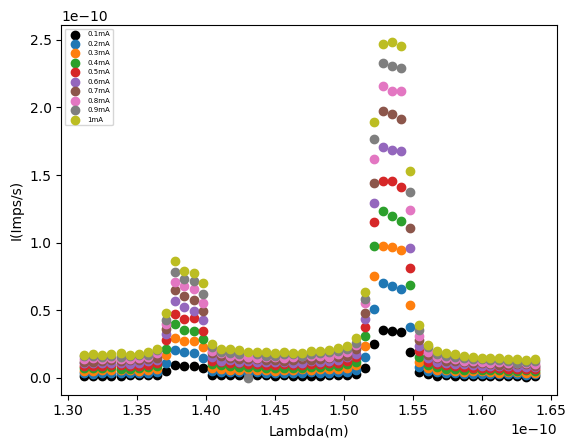

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

A = columnas["﻿angulo"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(np.sin(np.deg2rad(A[i]))*(2.014*10**(-10))*2)

B=columnas['0.1mA']
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.2mA']
Y2=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y2.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.3mA']
Y3=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y3.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.4mA']
Y4=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y4.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.5mA']
Y5=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y5.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.6mA']
Y6=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y6.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.7mA']
Y7=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y7.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.8mA']
Y8=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y8.append(-B[i]*(9.979-35)**(1.5))
B=columnas['0.9mA']
Y9=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y9.append(-B[i]*(9.979-35)**(1.5))
B=columnas['1mA']
Y10=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y10.append(-B[i]*(9.979-35)**(1.5))

plt.scatter(X, Y, color='black', label= "0.1mA")
plt.scatter(X, Y2, label="0.2mA")
plt.scatter(X, Y3, label="0.3mA")
plt.scatter(X, Y4, label="0.4mA")
plt.scatter(X, Y5, label="0.5mA")
plt.scatter(X, Y6, label="0.6mA")
plt.scatter(X, Y7, label="0.7mA")
plt.scatter(X, Y8, label="0.8mA")
plt.scatter(X, Y9, label="0.9mA")
plt.scatter(X, Y10, label="1mA")
plt.xlabel('Lambda(m)')
plt.ylabel("I(Imps/s)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("LambdavsITcte.png",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()

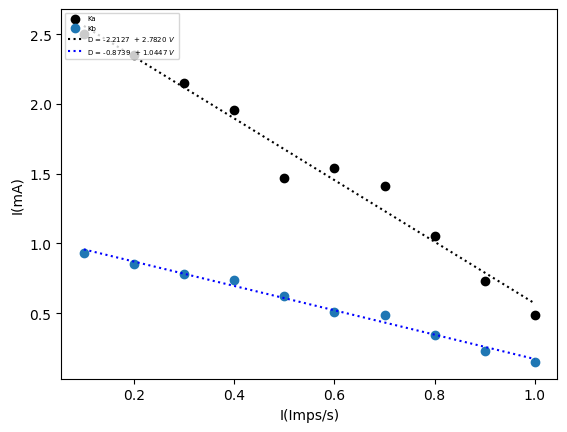

La incertidumbre en el pendiente es de 0.1238
La incertidumbre en el intercepto es de 0.0768
La incertidumbre en el pendiente es de 0.0347
La incertidumbre en el intercepto es de 0.0215


In [28]:
Ia=[2.5,2.35,2.15,1.96,1.47,1.54,1.41,1.05,0.73,0.49]
Ib=[0.93,0.85,0.78,0.74,0.62,0.51,0.49,0.34,0.23,0.15]
A=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(A, Ia)
regression_line1 = [(slope1 * x) + intercept1 for x in A]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(A, Ib)
regression_line2 = [(slope2 * x) + intercept2 for x in A]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(A)**2))
delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(A)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(A, Ia)]
residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(A, Ib)]

plt.scatter(A, Ia, color='black', label= "Ka")
plt.scatter(A, Ib, label="Kb")
plt.plot(A, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(A, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.xlabel('I(Imps/s)')
plt.ylabel("I(mA)")
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("KaKbvsI.png",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")

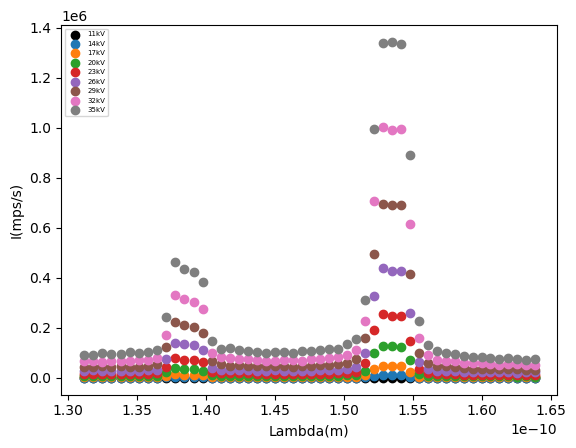

In [15]:
B=columnas['11kV']
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i]*(11-9.979)**(1.5))
B=columnas['14kV']
Y2=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y2.append(B[i]*(14-9.979)**(1.5))
B=columnas['17kV']
Y3=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y3.append(B[i]*(17-9.979)**(1.5))
B=columnas['20kV']
Y4=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y4.append(B[i]*(20-9.979)**(1.5))
B=columnas['23kV']
Y5=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y5.append(B[i]*(23-9.979)**(1.5))
B=columnas['26kV']
Y6=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y6.append(B[i]*(26-9.979)**(1.5))
B=columnas['29kV']
Y7=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y7.append(B[i]*(29-9.979)**(1.5))
B=columnas['32kV']
Y8=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y8.append(B[i]*(32-9.979)**(1.5))
B=columnas['35kV']
Y9=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y9.append(B[i]*(35-9.979)**(1.5))
B=columnas['1mA']

plt.scatter(X, Y, color='black', label= "11kV")
plt.scatter(X, Y2, label="14kV")
plt.scatter(X, Y3, label="17kV")
plt.scatter(X, Y4, label="20kV")
plt.scatter(X, Y5, label="23kV")
plt.scatter(X, Y6, label="26kV")
plt.scatter(X, Y7, label="29kV")
plt.scatter(X, Y8, label="32kV")
plt.scatter(X, Y9, label="35kV")
plt.xlabel('Lambda(m)')
plt.ylabel("I(mps/s)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("LambdavsIVcte.png",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()

In [16]:
A=np.sort(Y)
print(A[-1].real)

321.87941781789067


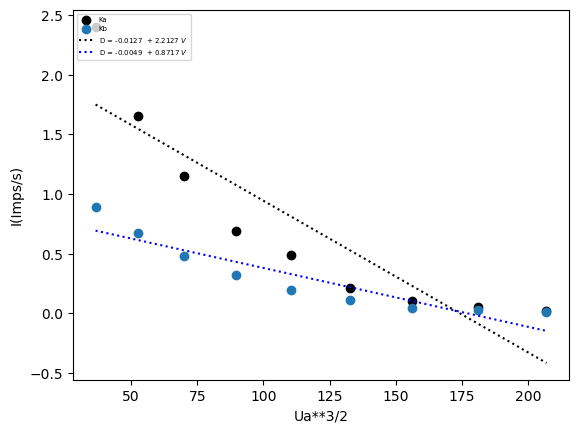

La incertidumbre en el pendiente es de 0.0023
La incertidumbre en el intercepto es de 0.2969
La incertidumbre en el pendiente es de 0.0008
La incertidumbre en el intercepto es de 0.1003


In [26]:
Ia=[2.4,1.65,1.15,0.69,0.49,0.21,0.1,0.05,0.02]
Ib=[0.89,0.67,0.48,0.32,0.19,0.11,0.04,0.03,0.01]
A=[11**1.5,14**1.5,17**1.5,20**1.5,23**1.5,26**1.5,29**1.5,32**1.5,35**1.5]


slope1, intercept1, r_value1, p_value1, std_err1 = linregress(A, Ia)
regression_line1 = [(slope1 * x) + intercept1 for x in A]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(A, Ib)
regression_line2 = [(slope2 * x) + intercept2 for x in A]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(A)**2))
delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(A)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(A, Ia)]
residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(A, Ib)]

plt.scatter(A, Ia, color='black', label= "Ka")
plt.scatter(A, Ib, label="Kb")
plt.plot(A, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(A, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.ylabel('I(Imps/s)')
plt.xlabel("Ua**3/2")
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
#plt.savefig("IvsV**3/2.pdf",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")

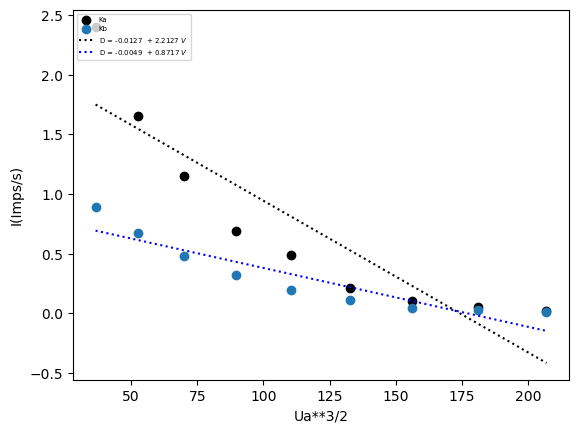

La incertidumbre en el pendiente es de 0.0023
La incertidumbre en el intercepto es de 0.2969
La incertidumbre en el pendiente es de 0.0008
La incertidumbre en el intercepto es de 0.1003


In [24]:
Ia=[2.4,1.65,1.15,0.69,0.49,0.21,0.1,0.05,0.02]
Ib=[0.89,0.67,0.48,0.32,0.19,0.11,0.04,0.03,0.01]
Ua=[(11-9.979)**1.5,(14-9.979)**1.5,(17-9.979)**1.5,(20-9.979)**1.5,(23-9.979)**1.5,(26-9.979)**1.5,(29-9.979)**1.5,(32-9.979)**1.5,(35-9.979)**1.5]

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(A, Ia)
regression_line1 = [(slope1 * x) + intercept1 for x in A]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(A, Ib)
regression_line2 = [(slope2 * x) + intercept2 for x in A]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(A)**2))
delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(A)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(A, Ia)]
residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(A, Ib)]

plt.scatter(A, Ia, color='black', label= "Ka")
plt.scatter(A, Ib, label="Kb")
plt.plot(A, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(A, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.ylabel('I(Imps/s)')
plt.xlabel("Ua**3/2")
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
#plt.savefig("IvsV**3/2.pdf",bbox_inches='tight')
# Mostrar la gráfica
#plt.figure(figsize=(20,10))

plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")

In [ ]:
print(Ua[0])